In [18]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os

In [19]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
repBL='/home/ebb505/ARE_Project/are-logs/BL/'
repPN='/home/ebb505/ARE_Project/are-logs/NS/'
repGR='/home/ebb505/ARE_Project/are-logs/GRi/'
repPGR='/home/ebb505/ARE_Project/are-logs/GRe/'
fnDesc='norepmorphdesc.csv' # REMEMBER TO NOT COUNT UNTIL -1
#filename='morphdesc.csv' # REMEMBER TO NOT COUNT UNTIL -1
fnTests='noreptests.csv' # REMEMBER TO NOT COUNT UNTIL -1

In [20]:
# Get all directories
foldBL = []
foldPN = []
foldGR = []
foldPGR = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repBL):
    for folder in d:
        foldBL.append(os.path.join(r, folder))
for r, d, f in os.walk(repPN):
    for folder in d:
        foldPN.append(os.path.join(r, folder))
for r, d, f in os.walk(repGR):
    for folder in d:
        foldGR.append(os.path.join(r, folder))
for r, d, f in os.walk(repPGR):
    for folder in d:
        foldPGR.append(os.path.join(r, folder))

In [21]:
# See directories
print("BL = ", len(foldBL))
print("PN = ", len(foldPN))
print("GR = ", len(foldGR))
print("PGR = ", len(foldPGR))

BL =  18
PN =  18
GR =  29
PGR =  15


In [22]:
# Get information from files
# BL
repTestsBL = []
repManBL = []
for f in foldBL:
    my_list_tests = []
    my_list_man = []
    with open(f + '/' + fnTests, 'r') as testCsvfile, \
    open(f + '/' + fnDesc, 'r') as descCsvfile:
        dataTests = csv.reader(testCsvfile, delimiter=',', quotechar='"')
        dataMan = csv.reader(descCsvfile, delimiter=',', quotechar='"')
        for row in dataTests:
            my_list_tests.append(row[:-1]) 
        for row in dataMan:
            my_list_man.append(row[:-1]) 
    repTestsBL.append(my_list_tests)
    repManBL.append(my_list_man)
# PN
repTestsPN = []
repManPN = []
for f in foldPN:
    my_list_tests = []
    my_list_man = []
    with open(f + '/' + fnTests, 'r') as testCsvfile, \
    open(f + '/' + fnDesc, 'r') as descCsvfile:
        dataTests = csv.reader(testCsvfile, delimiter=',', quotechar='"')
        dataMan = csv.reader(descCsvfile, delimiter=',', quotechar='"')
        for row in dataTests:
            my_list_tests.append(row[:-1]) 
        for row in dataMan:
            my_list_man.append(row[:-1]) 
    repTestsPN.append(my_list_tests)
    repManPN.append(my_list_man)
#GR
repTestsGR = []
repManGR = []
for f in foldGR:
    my_list_tests = []
    my_list_man = []
    with open(f + '/' + fnTests, 'r') as testCsvfile, \
    open(f + '/' + fnDesc, 'r') as descCsvfile:
        dataTests = csv.reader(testCsvfile, delimiter=',', quotechar='"')
        dataMan = csv.reader(descCsvfile, delimiter=',', quotechar='"')
        for row in dataTests:
            my_list_tests.append(row[:-1]) 
        for row in dataMan:
            my_list_man.append(row[:-1]) 
    repTestsGR.append(my_list_tests)
    repManGR.append(my_list_man)
#PGR
repTestsPGR = []
repManPGR = []
for f in foldPGR:
    my_list_tests = []
    my_list_man = []
    with open(f + '/' + fnTests, 'r') as testCsvfile, \
    open(f + '/' + fnDesc, 'r') as descCsvfile:
        dataTests = csv.reader(testCsvfile, delimiter=',', quotechar='"')
        dataMan = csv.reader(descCsvfile, delimiter=',', quotechar='"')
        for row in dataTests:
            my_list_tests.append(row[:]) 
        for row in dataMan:
            my_list_man.append(row[:]) 
    repTestsPGR.append(my_list_tests)
    repManPGR.append(my_list_man)

In [23]:
population = 40
#replicates = len(repBL)
replicates = 15
#evaluations = len(repBL[0])
evaluations = 20000
features = len(repBL[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  20000 Features:  1 Generations:  500


In [24]:
# Process data and ignore non-manufacturable and non-viable
repResBL = []
for rep in range(replicates):
    datTest = np.array([[float(y) for y in x] for x in repTestsBL[rep]]) # Convert to array
    datMan = np.array([[float(y) for y in x] for x in repManBL[rep]]) # Convert to array
    tempMan = []
    for i in range(len(datTest)):    
        if(datTest[i,1] > 0 \
               and datTest[i,2] > 0 \
               and datTest[i,3] > 0 \
               and datTest[i,4] > 0 \
               and datTest[i,5] > 0 \
               and datMan[i,4] > 0 \
               and datMan[i,5] > 0
              ):
            tempMan.append(datMan[i])
    repResBL.append(tempMan)
print("Done!")
# Process data
repResPN = []
for rep in range(replicates):
    datTest = np.array([[float(y) for y in x] for x in repTestsPN[rep]]) # Convert to array
    datMan = np.array([[float(y) for y in x] for x in repManPN[rep]]) # Convert to array
    tempMan = []
    for i in range(len(datTest)):    
        if(datTest[i,1] > 0 \
               and datTest[i,2] > 0 \
               and datTest[i,3] > 0 \
               and datTest[i,4] > 0 \
               and datTest[i,5] > 0 \
               and datMan[i,4] > 0 \
               and datMan[i,5] > 0
              ):
            tempMan.append(datMan[i])
    repResPN.append(tempMan)
print("Done!")
# Process data
repResGR = []
for rep in range(replicates):
    datTest = np.array([[float(y) for y in x] for x in repTestsGR[rep]]) # Convert to array
    datMan = np.array([[float(y) for y in x] for x in repManGR[rep]]) # Convert to array
    tempMan = []
    for i in range(len(datTest)):    
        if(datTest[i,1] > 0 \
               and datTest[i,2] > 0 \
               and datTest[i,3] > 0 \
               and datTest[i,4] > 0 \
               and datTest[i,5] > 0 \
               and datMan[i,4] > 0 \
               and datMan[i,5] > 0
              ):
            tempMan.append(datMan[i])
    repResGR.append(tempMan)
print("Done!")
# Process data
repResPGR = []
for rep in range(replicates):
    datTest = np.array([[float(y) for y in x] for x in repTestsPGR[rep]]) # Convert to array
    datMan = np.array([[float(y) for y in x] for x in repManPGR[rep]]) # Convert to array
    tempMan = []
    for i in range(len(datTest)):    
        if(datTest[i,1] > 0 \
               and datTest[i,2] > 0 \
               and datTest[i,3] > 0 \
               and datTest[i,4] > 0 \
               and datTest[i,5] > 0 \
               and datMan[i,4] > 0 \
               and datMan[i,5] > 0
              ):
            tempMan.append(datMan[i])
    repResPGR.append(tempMan)
print("Done!")

Done!
Done!
Done!
Done!


In [25]:
repDistBL = []
for rep in range(replicates):
    temAve = []
    for i in range(len(repResBL[rep])):
        temDis = []
        for j in range(len(repResBL[rep])):
            dist = np.linalg.norm(repResBL[rep][i][1:]-repResBL[rep][j][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
    repDistBL.append(np.mean(temAve))
    print(rep)
print("BL -> Done!")

repDistPN = []
for rep in range(replicates):
    temAve = []
    for i in range(len(repResPN[rep])):
        temDis = []
        for j in range(len(repResPN[rep])):
            dist = np.linalg.norm(repResPN[rep][i][1:]-repResPN[rep][j][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
    repDistPN.append(np.mean(temAve))
    print(rep)
print("PN -> Done!")

repDistGR = []
for rep in range(replicates):
    temAve = []
    for i in range(len(repResGR[rep])):
        temDis = []
        for j in range(len(repResGR[rep])):
            dist = np.linalg.norm(repResGR[rep][i][1:]-repResGR[rep][j][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
    repDistGR.append(np.mean(temAve))
    print(rep)
print("GR - > Done!")


repDistPGR = []
for rep in range(replicates):
    temAve = []
    for i in range(len(repResPGR[rep])):
        temDis = []
        for j in range(len(repResPGR[rep])):
            dist = np.linalg.norm(repResPGR[rep][i][1:]-repResPGR[rep][j][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
    repDistPGR.append(np.mean(temAve))
    print(rep)
print("PGR -> Done!")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
BL -> Done!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
PN -> Done!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
GR - > Done!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
PGR -> Done!


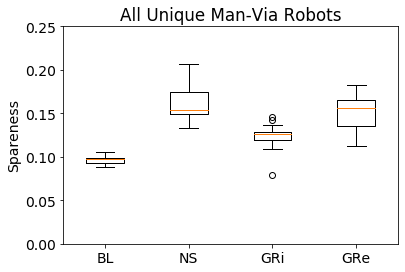

In [27]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

# Plot box plot stuff
plt.boxplot([repDistBL, repDistPN, repDistGR, repDistPGR])
#plt.boxplot([[x / 2 for x in repDistBL], [x / 2 for x in repDistPN], [x / 2 for x in repDistGR], [x / 2 for x in repDistPGR]], notch=True)

#Label and stuff
axes = plt.gca()
axes.set_ylim([0,0.25])
#axes.set_ylim([0,0.03])
plt.ylabel('Spareness')
plt.title("All Unique Man-Via Robots")
rangeX = ['BL', 'NS', 'GRi', 'GRe'] 
posX = [1,2,3,4]
plt.xticks(posX,rangeX)
plt.savefig(repository+'SparenessMV.png', dpi=200)